In [112]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams["font.sans-serif"] = ["SimHei"]  #设置字体
plt.rcParams["axes.unicode_minus"] = False  #该语句解决图像中的“-”负号的乱码问题
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import os

os.chdir(r'D:\pycharm-python\datasets')
import seaborn as sns

sns.set_theme(style='whitegrid')
from sklearn.model_selection import KFold, cross_val_score, cross_validate, GridSearchCV
from sklearn import metrics
import scipy

In [113]:
def load_data():
    df = pd.read_csv(r'0219_train_data.csv')
    df = df.drop(['Unnamed: 0'], axis=1)
    new_df = df.copy()
    arr = np.array(new_df)[:, 2:]
    x = arr[:, :-1].copy()
    y = arr[:, -1:].copy()
    return df, x, y

In [114]:
df, x, y = load_data()

### 建立回归模型之前的准备工作：
1. 分析相关系数矩阵
2. 分析显著性检验矩阵

+ 相关稀疏矩阵

In [115]:
# 相关系数矩阵
corr = df.corr()

C:\Users\29236\AppData\Local\Temp\ipykernel_11352\3527500670.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


+ P-value,

In [116]:
# 相关系数已经保存为corr_matrix.csv文件
correlation, p_value = scipy.stats.pearsonr(df['GDP'], df['DN'])  #相关系数与P-value
correlation, p_value


(0.5235210153542059, 5.197464374679263e-10)

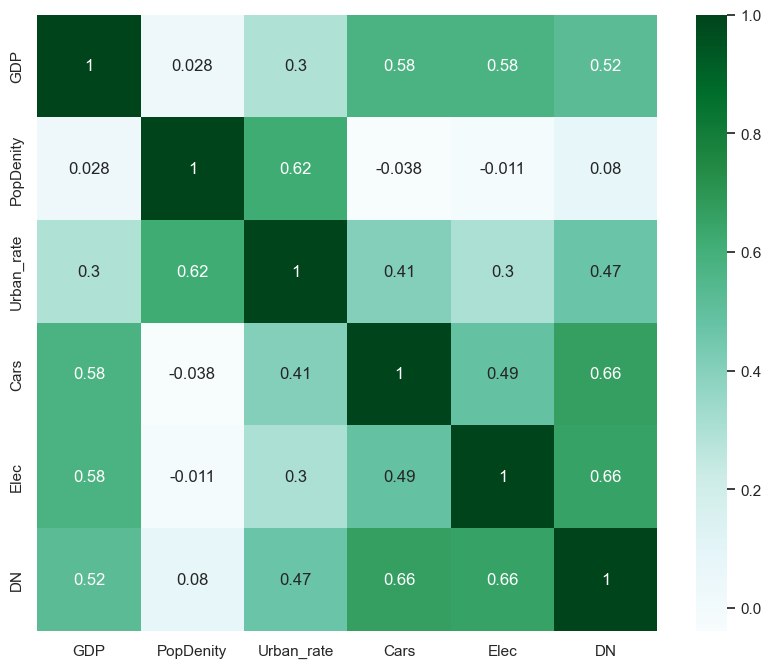

In [117]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='BuGn')
plt.show()

**显著性检验矩阵**：
显著性检验的目的是为了 将从样本中得到的结论推广到总体中，通过“小概率事件是不可能事件”这一原理进行推断。一般而言是对总体做出原假设，然后通过对随机的样本数据对原假设进行分析，判断其与原假设是否存在显著性的差异。

In [81]:
# 显著性检验矩阵、


In [118]:
cv = KFold(n_splits=4, shuffle=True, random_state=10)

In [119]:
regressor = RandomForestRegressor(
    # n_estimators=64,
    oob_score=True,
    random_state=10
)

In [122]:
r2 = cross_val_score(regressor, x, y, cv=cv, scoring='r2')

In [123]:
r2

array([0.28415098, 0.50570472, 0.58065366, 0.74664365])

In [124]:
r2.mean()

0.5292882532324605

In [125]:
r2.std()

0.16623044208738405

In [126]:
mae = cross_val_score(regressor, x, y, scoring='neg_mean_absolute_error')

In [127]:
mae.mean()

-248.47000609999995

In [128]:
mae.std()

45.955143806759544

In [121]:
y = y.reshape((y.shape[0],))

In [92]:
y.shape

(123,)

### 进行调参

In [129]:
params_test1 = [
    {'max_depth': range(1,10)}
]
gsearch = GridSearchCV(
    estimator=RandomForestRegressor(
        min_samples_split=1,
        min_samples_leaf=2,
        # max_depth=4,
        max_features='sqrt',
        n_estimators=60,
        random_state=10
    ),
    param_grid=params_test1,
    scoring='r2',
    cv=5,
    return_train_score=True
)

In [94]:
# gsearch.best_score_,gsearch.best_params_

In [131]:
rf = RandomForestRegressor(
    min_samples_split=1,
    min_samples_leaf=2,
    max_features='sqrt',
    n_estimators=60,
    random_state=10,
    max_depth=8,
    oob_score=True
)

In [132]:
rf.fit(x,y)
r2 = cross_val_score(rf,x,y,cv=cv,scoring='r2')
r2

array([0.3447355 , 0.53783373, 0.73281359, 0.79396926])

In [133]:
rf.decision_path(x[:1,:])

(<1x3470 sparse matrix of type '<class 'numpy.int64'>'
 	with 350 stored elements in Compressed Sparse Row format>,
 array([   0,   55,  110,  163,  230,  297,  348,  407,  470,  535,  590,
         645,  704,  761,  818,  869,  928,  993, 1050, 1115, 1166, 1229,
        1284, 1339, 1398, 1437, 1498, 1561, 1618, 1677, 1736, 1801, 1868,
        1933, 1990, 2039, 2094, 2153, 2204, 2273, 2334, 2393, 2454, 2505,
        2556, 2609, 2678, 2739, 2794, 2859, 2912, 2981, 3036, 3101, 3152,
        3203, 3258, 3307, 3344, 3409, 3470]))

In [134]:
r2.mean()

0.6023380198700115

In [135]:
r2.std()
# df

0.17625710684159573

<AxesSubplot: xlabel='GDP', ylabel='DN'>

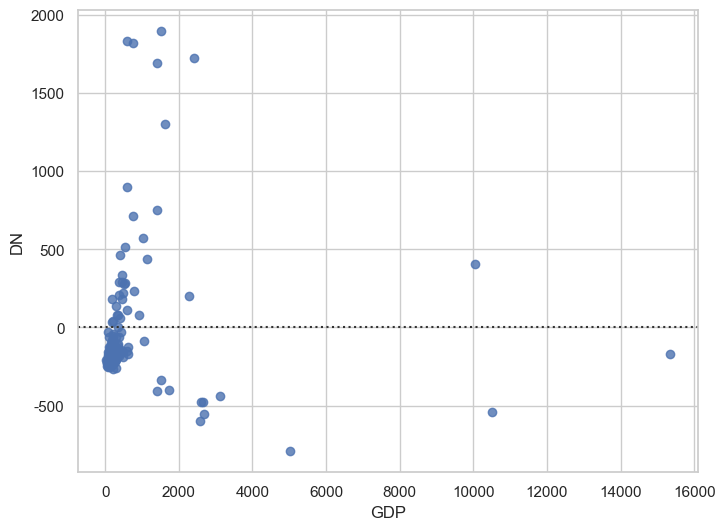

In [136]:
fig = plt.figure(figsize=(8,6))


sns.residplot(data=df.drop(['Province','City'],axis=1),x='GDP',y='DN')


In [137]:
mae = cross_val_score(rf,x,y,scoring='neg_mean_absolute_error',cv=cv)

In [138]:
mae = -mae
mae

array([136.53026715, 295.19319946, 203.52782554, 173.8915485 ])

In [139]:
mae.mean()

202.28571016041172

In [140]:
mae.std()

58.65865477392188

In [141]:
importance = rf.feature_importances_

In [142]:
df.head()

,Province,City,GDP,PopDenity,Urban_rate,Cars,Elec,DN
0,重庆市,渝中区,362.38,23222.0,93.18,4.1205,5.50,310.49
1,重庆市,大足区,286.02,1337.0,50.94,4.8136,3.27,31.47
2,重庆市,开州区,131.03,1364.0,44.23,9.9600,12.52,18.16
3,重庆市,城口县,68.37,66.0,30.54,0.9496,1.68,7.15
4,浙江省,杭州市,1404.70,2045.0,85.87,106.0000,335.90,2147.46


In [143]:
importance

array([0.19506651, 0.12837602, 0.16158163, 0.17481339, 0.34016246])

([<matplotlib.patches.Wedge at 0x2403118ff70>,
 [Text(1.7996650117781856, 1.2653876265324489, 'GDP'),
  Text(-0.1278532597407455, 2.1962817542322903, 'PopDenity'),
  Text(-1.8135995593826297, 1.2453339464605997, 'Urban_rate'),
  Text(-1.9760809159494652, -0.9670078663694124, 'Cars'),
  Text(1.0588741948477252, -1.928415266348403, 'Elec')],
 [Text(0.9816354609699193, 0.6902114326540629, '19.51%'),
  Text(-0.06973814167677025, 1.1979718659448855, '12.84%'),
  Text(-0.9892361232996161, 0.6792730617057815, '16.16%'),
  Text(-1.0778623177906173, -0.5274588362014976, '17.48%'),
  Text(0.5775677426442137, -1.0518628725536743, '34.02%')])

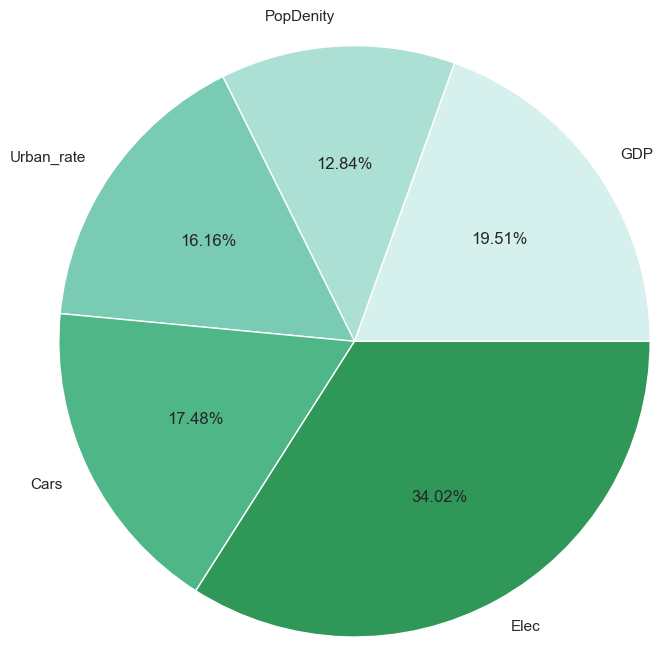

In [144]:
colors = plt.get_cmap('BuGn')(np.linspace(0.2, 0.7, len(importance)))
plt.pie(x=importance, radius=2, center=(0, 0), autopct='%.2f%%', labels=df.columns.tolist()[2:-1], colors=colors)

In [145]:
from sklearn.svm import SVR

linear_svm = SVR(kernel='linear')
linear_svm_r2 = cross_val_score(linear_svm,x,y,scoring='r2',cv=cv)

In [110]:
linear_svm_r2

array([0.25507262, 0.48397081, 0.41807587, 0.57581125])

**进行假设检验与F检验,绘制残差分析图**

In [111]:
`gsearch.fit(x, y)

SyntaxError: invalid syntax (1821425708.py, line 1)

In [ ]:
gsearch.best_score_, gsearch.best_params_

In [ ]:
params_test2 = [
    {'max_depth': range(3, 14, 2), 'min_samples_split': range(50, 201, 20)}
]
gsearch2 = GridSearchCV(
    estimator=RandomForestRegressor(
        min_samples_leaf=10,
        max_features='sqrt',
        # oob_score=True,
        random_state=10
    ),
    param_grid=params_test2,
    scoring='r2',
    # iid = False
    cv=5,
    return_train_score=True
)
gsearch2.fit(x, y)

In [ ]:
gsearch2.best_params_

In [ ]:
gsearch2.best_score_

In [ ]:
param_test3 = {'min_samples_leaf': range(10, 60, 10)}
gsearch3 = GridSearchCV(
    estimator=RandomForestRegressor(
        n_estimators=60,
        max_depth=3,
        max_features='sqrt',
        oob_score=True,
        min_samples_split=50,
        random_state=10
    ),
    param_grid=param_test3,
    scoring='r2',
    # iid=False,
    cv=5
)
gsearch3.fit(x, y)


In [ ]:
# gsearch3.grid_scores_, \
gsearch3.best_params_, gsearch3.best_score_

In [ ]:
from sklearn.model_selection import validation_curve


In [ ]:
train_scores,test_scores = validation_curve(
    rf,
    x,
    y,
    cv=5
)

In [150]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [151]:
linreg.fit(x,y)

LinearRegression()

In [152]:
linreg.score(x,y)

0.614308215328887

In [153]:
r2_linreg = cross_val_score(linreg,x,y,scoring='r2')

In [154]:
r2_linreg


array([0.73045453, 0.29830063, 0.51131933, 0.66853705, 0.42549582])

In [155]:
r2_linreg.mean()

0.5268214712602958

In [ ]:
# 计算相对误差

[模型验证参考这篇文章](https://www.cnblogs.com/pinard/p/6016029.html)

In [162]:
test_data = pd.read_csv(r'验证集.csv')

In [163]:
test_data

,省份,地区,x1,x2,x3,x4,x5,target
0,四川省,阿坝藏族羌族自治州,216.69,273.18,30.96,28.6,24.80,53.3
1,西藏自治区,阿里地区,96.96,28.90,0.70,17.3,1.56,2.5
2,湖北省,荆门市,95.46,286.75,625.87,58.9,170.30,64.6
3,广东省,广州市,2065.87,2287.80,1678.00,86.2,380.80,295.7


In [176]:
y_test = test_data.iloc[:,2:3]
x_test = test_data.iloc[:,3:]

In [177]:
x_test

,x2,x3,x4,x5,target
0,273.18,30.96,28.6,24.80,53.3
1,28.90,0.70,17.3,1.56,2.5
2,286.75,625.87,58.9,170.30,64.6
3,2287.80,1678.00,86.2,380.80,295.7


In [178]:
y_test

,x1
0,216.69
1,96.96
2,95.46
3,2065.87


In [179]:
x_test_arr = np.array(x_test)
x_test_arr

array([[2.7318e+02, 3.0960e+01, 2.8600e+01, 2.4800e+01, 5.3300e+01],
       [2.8900e+01, 7.0000e-01, 1.7300e+01, 1.5600e+00, 2.5000e+00],
       [2.8675e+02, 6.2587e+02, 5.8900e+01, 1.7030e+02, 6.4600e+01],
       [2.2878e+03, 1.6780e+03, 8.6200e+01, 3.8080e+02, 2.9570e+02]])

In [180]:
y_test_arr = np.array(y_test)
y_test_arr

array([[ 216.69],
       [  96.96],
       [  95.46],
       [2065.87]])

In [187]:
ans = rf.predict(x_test_arr)
ans

array([ 158.76894417,   75.84797262,  464.21255397, 1827.6881631 ])

In [190]:
def relative_error(x1,x2):
    mse = 0
    for i in range(len(x1)):
        mse+=
    return np.sqrt(mse)/np.sum(x1)

In [192]:
relative_error([y_test_arr[0],y_test_arr[1],y_test_arr[3]],[ans[0],ans[1],ans[2]])

array([0.10339514])